## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single dataset
mouse_merged_df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")

#Check for NaN
#mouse_merged_df.isnull().sum()

# Display the data table for preview
mouse_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
#rename columns for ease of use
mouse_merged_df = mouse_merged_df.rename(columns={"Mouse ID": "mouse_id", "Drug Regimen": "drug_regimen", "Sex" : "sex", 
                                         "Age_months" : "age_months", "Weight (g)" : "weight", "Timepoint" : "timepoint",
                                         "Tumor Volume (mm3)" : "tumor_vol", "Metastatic Sites" : "meta_sites"})
mouse_merged_df.head()

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
nmice = mouse_merged_df["mouse_id"].nunique()
print(nmice)

249


In [12]:
#Find mice with duplicate timepoints
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_merged_df[mouse_merged_df.duplicated(["mouse_id", "timepoint"], keep = False)] 
duplicate

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned_df = mouse_merged_df.set_index("mouse_id", drop = False)
mouse_cleaned_df = mouse_cleaned_df.drop(["g989"])
mouse_cleaned_df.reset_index(drop = "True")
mouse_cleaned_df.head()

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
mouse_id,,,,,,,,
k403,k403,Ramicane,Male,21,16,0,45.000000,0
k403,k403,Ramicane,Male,21,16,5,38.825898,0
k403,k403,Ramicane,Male,21,16,10,35.014271,1
k403,k403,Ramicane,Male,21,16,15,34.223992,1
k403,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.
nmice2 = mouse_cleaned_df["mouse_id"].nunique()
print(nmice2)

248


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_cleaned_df.head()
drug_groups = mouse_cleaned_df.groupby("drug_regimen")
type(drug_groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [21]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = pd.DataFrame(drug_groups["tumor_vol"].mean())
tumor_vol_median = pd.DataFrame(drug_groups["tumor_vol"].median())
tumor_vol_var = pd.DataFrame(drug_groups["tumor_vol"].var())
tumor_vol_std = pd.DataFrame(drug_groups["tumor_vol"].std())
tumor_vol_sem = pd.DataFrame(drug_groups["tumor_vol"].sem())

In [23]:
#tumor_vol_mean

In [25]:
#tumor_vol_median

In [ ]:
#tumor_vol_var

In [ ]:
#tumor_vol_std

In [27]:
#tumor_vol_sem

In [28]:
# Assemble the resulting series into a single summary dataframe.
summary_df = tumor_vol_mean.merge(tumor_vol_median, on = "drug_regimen", suffixes = ("_mean", "_median"))
summary_df = summary_df.merge(tumor_vol_var, on = 'drug_regimen')
summary_df = summary_df.merge(tumor_vol_std, on = "drug_regimen", suffixes = ("_var", "_std_dev"))
summary_df = summary_df.merge(tumor_vol_sem, on = "drug_regimen")
summary_df = summary_df.rename(columns = {"tumor_vol_mean" : "Mean of Tumor Volume (mm3)",
                                          "tumor_vol_median" : "Median of Tumor Volume (mm3)",
                                          "tumor_vol_var" : "Variance of Tumor Volume",
                                          "tumor_vol_std_dev" : "Standard Deviation of Tumor Volume",
                                          "tumor_vol" : "Standard of the Mean of Tumor Volume"})
summary_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard of the Mean of Tumor Volume
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = mouse_cleaned_df.groupby(mouse_cleaned_df["drug_regimen"]).tumor_vol.agg(["mean", "median", "var", "std", 
                                               "sem"]) 
summary_agg_df

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

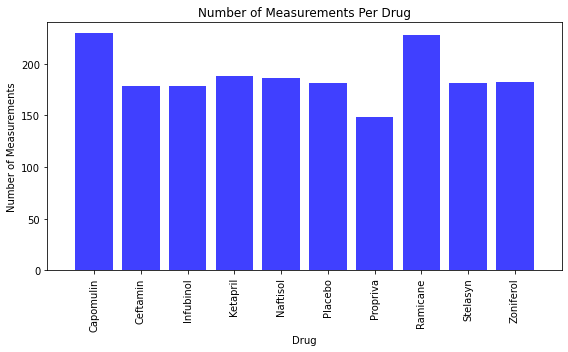

In [58]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = pd.DataFrame(drug_groups["timepoint"].count().reset_index())
x_axis =np.arange(len(measurements_df))
tick_locations = [value for value in x_axis]
timepts = list(measurements_df["timepoint"])
#print(timepts)
plt.figure(figsize=(8,5))
plt.bar(x_axis, timepts, color='b', alpha=0.75, align="center")
plt.xticks(tick_locations, measurements_df["drug_regimen"], rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(measurements_df["timepoint"])+10)
plt.title("Number of Measurements Per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
